In [412]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlb
import seaborn as sns
from datetime import datetime, date, time
from dateutil.parser import parse
import warnings
warnings.filterwarnings('ignore')
import os
import glob

In [273]:
#Read data folder of fact book
DATA_FOLDER = './Data'

In [274]:
#Determine country list that are included in Now Corpus
country_List=['US', 'EI' ,'AU' ,'GB' ,'CA', 'IN' ,'NZ' ,'ZA', 'LK', 'SG', 'PH' ,'GH', 'NG', 'KE',
 'HK', 'JM', 'PK' ,'BD', 'MY' ,'TZ']
#convert the country names to lower cases
country_List=[x.lower() for x in country_List]

In [275]:
#check how many country we have
len(country_List)

20

In [277]:
#check what is inside the factbook data folder 
folders_list=os.listdir(DATA_FOLDER+"/factbook.json")

In [278]:
folders_list

['README.md',
 'south-america',
 'package.json',
 'oceans',
 'world',
 'ALMANAC.md',
 'south-asia',
 '.git',
 'NOTES.md',
 'australia-oceania',
 'MONGO.md',
 'europe',
 'central-asia',
 'central-america-n-caribbean',
 'north-america',
 'LICENSE.md',
 'middle-east',
 'africa',
 'meta',
 'SUMMARY.md',
 'antarctica',
 'east-n-southeast-asia']

In [413]:
#Get Per country json files from factbook data
countryData_List=glob.glob(DATA_FOLDER+"/factbook.json/*/*.json")
countryData_List

['./Data/factbook.json/south-america/ci.json',
 './Data/factbook.json/south-america/bl.json',
 './Data/factbook.json/south-america/pa.json',
 './Data/factbook.json/south-america/co.json',
 './Data/factbook.json/south-america/ns.json',
 './Data/factbook.json/south-america/gy.json',
 './Data/factbook.json/south-america/ve.json',
 './Data/factbook.json/south-america/uy.json',
 './Data/factbook.json/south-america/br.json',
 './Data/factbook.json/south-america/fk.json',
 './Data/factbook.json/south-america/ec.json',
 './Data/factbook.json/south-america/ar.json',
 './Data/factbook.json/south-america/sx.json',
 './Data/factbook.json/south-america/pe.json',
 './Data/factbook.json/oceans/zn.json',
 './Data/factbook.json/oceans/oo.json',
 './Data/factbook.json/oceans/zh.json',
 './Data/factbook.json/oceans/xq.json',
 './Data/factbook.json/oceans/xo.json',
 './Data/factbook.json/world/xx.json',
 './Data/factbook.json/south-asia/np.json',
 './Data/factbook.json/south-asia/io.json',
 './Data/factbo

In [414]:
#filter out only the selected countries data
ourcountries=[]
for i in country_List:
    for j in countryData_List:
        if i in j[len(j)-7:]:
            ourcountries.append(j)     

In [415]:
#check the json file list of selected countries
ourcountries

['./Data/factbook.json/north-america/us.json',
 './Data/factbook.json/europe/ei.json',
 './Data/factbook.json/europe/au.json',
 './Data/factbook.json/africa/gb.json',
 './Data/factbook.json/north-america/ca.json',
 './Data/factbook.json/south-asia/in.json',
 './Data/factbook.json/australia-oceania/nz.json',
 './Data/factbook.json/africa/za.json',
 './Data/factbook.json/south-asia/lk.json',
 './Data/factbook.json/africa/sg.json',
 './Data/factbook.json/east-n-southeast-asia/ph.json',
 './Data/factbook.json/africa/gh.json',
 './Data/factbook.json/africa/ng.json',
 './Data/factbook.json/africa/ke.json',
 './Data/factbook.json/east-n-southeast-asia/hk.json',
 './Data/factbook.json/central-america-n-caribbean/jm.json',
 './Data/factbook.json/south-asia/pk.json',
 './Data/factbook.json/north-america/bd.json',
 './Data/factbook.json/east-n-southeast-asia/my.json',
 './Data/factbook.json/africa/tz.json']

In [416]:
#Append all countries data files
worldFactRaw=[]
worldFactRaw.append([pd.read_json(f) for f in ourcountries])
countries=worldFactRaw[0]

In [417]:
#check how many country data we have
len(countries)

20

In [418]:
#check how one country data looks like
countries[5]

,Introduction,Geography,People and Society,Government,Economy,Energy,Communications,Transportation,Military and Security,Transnational Issues
Administrative divisions,NaN,NaN,NaN,{'text': '29 states and 7 union territories*; ...,NaN,NaN,NaN,NaN,NaN,NaN
Age structure,NaN,NaN,"{'0-14 years': {'text': '27.71% (male 186,420,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agriculture - products,NaN,NaN,NaN,NaN,"{'text': 'rice, wheat, oilseed, cotton, jute, ...",NaN,NaN,NaN,NaN,NaN
Airports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'text': '346 (2013)'},NaN,NaN
Airports - with paved runways,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'total': {'text': '253'}, 'over 3,047 m': {'t...",NaN,NaN
Airports - with unpaved runways,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'total': {'text': '93'}, 'over 3,047 m': {'te...",NaN,NaN
Area,NaN,"{'total': {'text': '3,287,263 sq km'}, 'land':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area - comparative,NaN,{'text': 'slightly more than one-third the siz...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Background,"{'text': 'The Indus Valley civilization, one o...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Birth rate,NaN,NaN,"{'text': '19.3 births/1,000 population (2016 e...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [419]:
#Get only the selected features per country and properly create a dataframe including each feature s a column
from pandas import DataFrame as df
factBook = df([p['Government']['Country name']['conventional short form']['text'], 
        p['Geography'][{'Geographic coordinates'}][0]['text'],
        p['Geography'][{'Natural hazards'}][0]['text'],
        p['Geography'][{'Environment - current issues'}][0]['text'],
        x.join(str(p['People and Society'][{'Population'}][0]['text']).split(" ",1)[0].split(',',3)),
        p['People and Society'][{'Age structure'}][0],
        p['People and Society'][{'Religions'}][0]['text'],
        p['People and Society'][{'Ethnic groups'}][0]['text'],
        p['People and Society'][{'Median age'}][0],
        p['People and Society'][{'Population growth rate'}][0]['text'],
        p['People and Society'][{'Birth rate'}][0]['text'],
        p['People and Society'][{'Death rate'}][0]['text'],
        p['People and Society'][{'Net migration rate'}][0]['text'],
        p['People and Society'][{'Sex ratio'}][0],
        p['People and Society'][{'Life expectancy at birth'}][0],
        #p['People and Society'][{'Literacy'}]
        #p['People and Society'][{'Unemployment, youth ages 15-24'}]
        p['Government'][{'Executive branch'}][0],
        p['Government'][{'Legislative branch'}][0],
        int(p['Economy'][{'GDP - per capita (PPP)'}][0]['text'].split(' ')[0].lstrip('$').replace(',', '')),
        p['Economy'][{'Unemployment rate'}][0],
        p['Economy'][{'Population below poverty line'}][0],
        p['Economy'][{'Inflation rate (consumer prices)'}][0],
        p['Energy'][{'Electricity - from other renewable sources'}][0],
        p['Energy'][{'Carbon dioxide emissions from consumption of energy'}][0],
        p['Communications'][{'Internet users'}][0]        
       ]
       
       for p in countries)
factBook
#re-assign proper column names
factBook.columns=['Country','Coordinates','Natural_hazards','Environment_issues',
        'Population',
        'Age_structure',
        'Religions',
        'Ethnic_groups',
        'Median age',
        'Population_growth_rate',
        'Birth_rate',
        'Death_rate',
        'Net_migration_rate',
        'Sex_ratio',
        'Life_expectancy_at_birth',
        'Executive_branch',
        'Legislative_branch',
        'GDP_per_capita',
        'Unemployment_rate',
        'Population_below_poverty_line',
        'Inflation_rate',
        'Electricity_renewable_sources',
        'Carbon_dioxide_emissions',
        'Internet users']

In [420]:
factBook['Population'][8]='22235'

In [421]:
factBook['Population']=factBook['Population'].astype('int')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

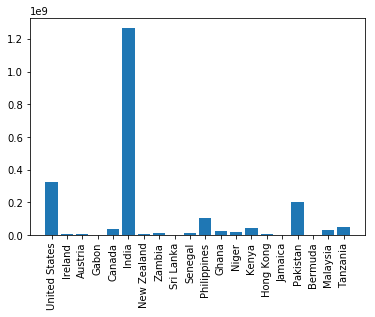

In [422]:
#Plot Population data for selected countries
plt.bar(factBook['Country'],factBook['Population'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

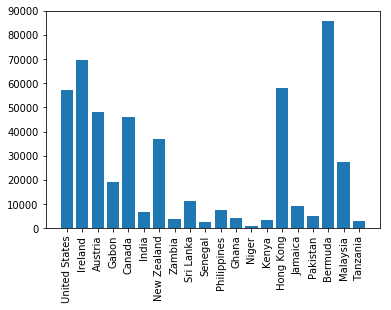

In [423]:
#Plot GDP per capita for selected countries
plt.bar(factBook['Country'],factBook['GDP_per_capita'])
plt.xticks(rotation=90)